In [133]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import statistics
import geopandas
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML
from time import time

In [141]:
cr = pd.read_csv("Cancer Rates.csv") 
cr["Leading Cancer Sites"].unique()
cr.head()
for idx, row in cr.iterrows():
        if "Unreliable" in row["Mortality-Incidence Age-Adjusted Rate Ratio"]:
            cr = cr.drop(idx)
cr["Mortality-Incidence Age-Adjusted Rate Ratio"] = cr["Mortality-Incidence Age-Adjusted Rate Ratio"].astype('float')
cr.head()

,Leading Cancer Sites,Year,State,Mortality-Incidence Age-Adjusted Rate Ratio,"Mortality Age-Adjusted Rate (per 100,000)","Incidence Age-Adjusted Rate (per 100,000)"
0,Brain and Other Nervous System,1999,Alabama,0.713,4.682,6.564
1,Brain and Other Nervous System,1999,Alaska,0.566,4.265,7.538
2,Brain and Other Nervous System,1999,Arizona,0.652,4.515,6.925
3,Brain and Other Nervous System,1999,California,0.733,4.836,6.602
4,Brain and Other Nervous System,1999,Colorado,0.658,4.439,6.742


In [135]:
us = geopandas.read_file("zip://states.zip")
us.set_index("STUSPS", drop=False, inplace=True)

def draw_map(cancer, year):
    cmapdict={}
    
    #load and clean cancer rate dataset
    cr = pd.read_csv("Cancer Rates.csv")  
    cr = cr.dropna()
    cr = cr.reset_index(drop=True)
    cr["Incidence Age-Adjusted Rate (per 100,000)"] = cr["Incidence Age-Adjusted Rate (per 100,000)"].astype('float')
    cr["Year"] = cr["Year"].astype('int')
    
    #sort based on type of cancer and year
    cr = cr[cr["Leading Cancer Sites"] == cancer]
    cr = cr[cr["Year"] == year]
    cr = cr.reset_index(drop=True)
    cr["cmap"]=cr["Incidence Age-Adjusted Rate (per 100,000)"]#/250
    for state in range(len(cr["State"])):
        cmapdict[cr["State"][state]] = cr["cmap"][state]
    
    #load us map dataset
    us = geopandas.read_file("zip://states.zip")
    us.set_index("STUSPS", drop=False, inplace=True)
    
    #add color map values to us map dataset
    vals = []
    for row in range(len(us)):
        try:
            val = cmapdict[us["NAME"][row]]
            vals.append(val)
        except:
            vals.append(0)
    us["cmap"] = vals
    
    #separate AK, HI; drop PR
    continent = us[~us["STUSPS"].isin(["AK", "HI", "PR"])]
    ak = us.loc["AK":"AK"]
    hi = us.loc["HI":"HI"]
    
    #plot map
    if cancer == "Melanoma of the Skin":
        cancer = "Melanoma"
    continent.plot(column = "cmap", cmap = "Purples", edgecolor="k", ax=ax1)
    plt.title("Incidence Rates for "+cancer +", " +str(year),fontsize = 15,fontweight = "bold")
    ak.plot(column = "cmap", cmap = "Purples", edgecolor="k", ax=ax2)
    hi.plot(column = "cmap", cmap = "Purples", edgecolor="k", ax=ax3)
    ax2.set_xlim(-180, -120)
    
    for ax in fig.axes:
        ax.axis("off")
    return 



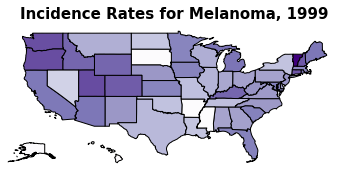

In [129]:

fig = plt.figure()
gs = fig.add_gridspec(8, 5)


ax2 = fig.add_subplot(gs[5, 0])
ax3 = fig.add_subplot(gs[5, 1])
ax1 = fig.add_subplot(gs[:7, :])

draw_map("Melanoma of the Skin",1999)

In [136]:
#Melanoma Incidence Rates

def draw_frame2(frame_num):
    year = 1999 + frame_num
    draw_map("Melanoma of the Skin", year)

fig = plt.figure()
gs = fig.add_gridspec(8, 5)

ax2 = fig.add_subplot(gs[5, 0])
ax3 = fig.add_subplot(gs[5, 1])
ax1 = fig.add_subplot(gs[:7, :])
    
anim = FuncAnimation(fig, draw_frame2, frames=18, interval=500)
html = anim.to_html5_video()
plt.close(fig)
HTML(html)

In [138]:
#mortality-incidence ratio

def draw_map1(cancer, year):
    cmapdict={}
    
    #load and clean cancer rate dataset
    cr = pd.read_csv("Cancer Rates.csv")  
    for idx, row in cr.iterrows():
        if "Unreliable" in row["Mortality-Incidence Age-Adjusted Rate Ratio"]:
            cr = cr.drop(idx)
    cr = cr.dropna()
    cr = cr.reset_index(drop=True)
    cr["Mortality-Incidence Age-Adjusted Rate Ratio"] = cr["Mortality-Incidence Age-Adjusted Rate Ratio"].astype('float')
    cr["Year"] = cr["Year"].astype('int')
    
    #sort based on type of cancer and year
    cr = cr[cr["Leading Cancer Sites"] == cancer]
    cr = cr[cr["Year"] == year]
    cr = cr.reset_index(drop=True)
    cr["cmap"]=cr["Mortality-Incidence Age-Adjusted Rate Ratio"]
    for state in range(len(cr["State"])):
        cmapdict[cr["State"][state]] = cr["cmap"][state]
    
    #load us map dataset
    us = geopandas.read_file("zip://states.zip")
    us.set_index("STUSPS", drop=False, inplace=True)
    
    #add color map values to us map dataset
    vals = []
    for row in range(len(us)):
        try:
            val = cmapdict[us["NAME"][row]]
            vals.append(val)
        except:
            vals.append(0)
    us["cmap"] = vals
    
    #separate AK, HI; drop PR
    continent = us[~us["STUSPS"].isin(["AK", "HI", "PR"])]
    ak = us.loc["AK":"AK"]
    hi = us.loc["HI":"HI"]
    
    #plot map
    if cancer == "Melanoma of the Skin":
        cancer = "Melanoma"
    continent.plot(column = "cmap", cmap = "Purples", edgecolor="k", ax=ax1)
    plt.title("Mortality-Incidence Ratios for "+cancer +", " +str(year),fontsize = 14, fontweight="bold")
    ak.plot(column = "cmap", cmap = "Purples", edgecolor="k", ax=ax2)
    hi.plot(column = "cmap", cmap = "Purples", edgecolor="k", ax=ax3)
    ax2.set_xlim(-180, -120)
    
    for ax in fig.axes:
        ax.axis("off")
    return 


In [139]:
#Melanoma Mortality-Incidence Rates

def draw_frame2(frame_num):
    year = 1999 + frame_num
    draw_map1("Melanoma of the Skin", year)

    
fig = plt.figure()
gs = fig.add_gridspec(8, 5)

ax2 = fig.add_subplot(gs[5, 0])
ax3 = fig.add_subplot(gs[5, 1])
ax1 = fig.add_subplot(gs[:7, :])
    
anim = FuncAnimation(fig, draw_frame2, frames=18, interval=500)
html = anim.to_html5_video()
plt.close(fig)
HTML(html)

In [121]:
def draw_map2(cancer, year):
    cmapdict={}
    
    #load and clean cancer rate dataset
    cr = pd.read_csv("Cancer Rates.csv")  
    cr = cr.dropna()
    cr = cr.reset_index(drop=True)
    cr["Mortality Age-Adjusted Rate (per 100,000)"] = cr["Mortality Age-Adjusted Rate (per 100,000)"].astype('float')
    cr["Year"] = cr["Year"].astype('int')
    
    #sort based on type of cancer and year
    cr = cr[cr["Leading Cancer Sites"] == cancer]
    cr = cr[cr["Year"] == year]
    cr = cr.reset_index(drop=True)
    cr["cmap"]=cr["Mortality Age-Adjusted Rate (per 100,000)"]
    for state in range(len(cr["State"])):
        cmapdict[cr["State"][state]] = cr["cmap"][state]
    
    #load us map dataset
    us = geopandas.read_file("zip://states.zip")
    us.set_index("STUSPS", drop=False, inplace=True)
    
    #add color map values to us map dataset
    vals = []
    for row in range(len(us)):
        try:
            val = cmapdict[us["NAME"][row]]
            val = val
            vals.append(val)
        except:
            vals.append(0)
    us["cmap"] = vals
    
    #separate AK, HI; drop PR
    continent = us[~us["STUSPS"].isin(["AK", "HI", "PR"])]
    ak = us.loc["AK":"AK"]
    hi = us.loc["HI":"HI"]
    
    #plot map
    if cancer == "Melanoma of the Skin":
        cancer = "Melanoma"
    continent.plot(column = "cmap", cmap = "Purples", edgecolor="k", ax=ax1)
    plt.title("Mortality Rates for "+cancer +", " +str(year),fontsize = 15, fontweight = "bold")
    ak.plot(column = "cmap", cmap = "Purples", edgecolor="k", ax=ax2)
    hi.plot(column = "cmap", cmap = "Purples", edgecolor="k", ax=ax3)
    ax2.set_xlim(-180, -120)
    
    for ax in fig.axes:
        ax.axis("off")
    return 


In [132]:
def draw_frame3(frame_num):
    year = 1999 + frame_num
    draw_map2("Melanoma of the Skin", year)

    
fig = plt.figure()
gs = fig.add_gridspec(8, 5)

ax2 = fig.add_subplot(gs[5, 0])
ax3 = fig.add_subplot(gs[5, 1])
ax1 = fig.add_subplot(gs[:7, :])
    
anim = FuncAnimation(fig, draw_frame3, frames=18, interval=500)
html = anim.to_html5_video()
plt.close(fig)
HTML(html)